# **CIC IoT 2023**

## Data Load & Understanding

### Import Library

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Data Load

In [2]:
# Direktori folder yang berisi file CSV
folder_path = 'C:\\Users\\ASUS\\Documents\\TA - Dicky Setiawan\\Dataset\\Data After Sampling'

# Inisialisasi list untuk menyimpan DataFrames dari setiap file CSV
dataframes = []

# Iterasi melalui semua file dalam folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Menggabungkan (concatenate) semua DataFrames menjadi satu
combined_df = pd.concat(dataframes, ignore_index=True)

# Menampilkan seluruh data
combined_df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,27.669304,689.9,12.6,90.3,39.116188,39.116188,0.0,0.0,0.0,0.0,...,22.304869,84.7,1.665239e+08,13.5,11.773372,31.603995,576.493062,1.0,244.6,Benign
1,91.378398,57996.0,14.8,61.2,5.994365,5.994365,0.0,0.0,0.0,0.0,...,660.857369,65.8,1.665225e+08,13.5,30.877932,936.184289,439567.877918,1.0,244.6,Benign
2,0.465044,1550299.8,6.0,87.6,3642.141552,3642.141552,0.0,0.0,0.0,0.0,...,460.086813,641.2,6.241798e-05,5.5,28.662564,650.661011,302982.643837,0.7,38.5,Benign
3,86.902002,1250155.9,11.5,130.6,21.738589,21.738589,0.0,0.0,0.0,0.0,...,443.997983,267.3,2.646551e-02,5.5,24.326006,627.907969,265530.195413,0.9,38.5,Benign
4,200.524157,6725.9,7.0,69.5,14.490983,14.490983,0.0,0.0,0.0,0.0,...,30.200387,89.3,1.665164e+08,13.5,13.060905,42.844485,966.638629,1.0,244.6,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104507,1506.055221,13838.3,7.6,111.6,9.918052,9.918052,0.0,0.0,0.0,0.0,...,101.590930,100.1,1.664820e+08,13.5,15.979358,143.602311,10338.790197,1.0,244.6,Web
104508,0.171103,3867.5,7.1,82.2,48.715740,48.715740,0.0,0.0,0.0,0.0,...,211.137956,191.0,1.676391e+08,13.5,21.733159,298.923575,44718.967554,1.0,244.6,Web
104509,162.027765,3476.5,14.2,106.9,0.500659,0.500659,0.0,0.0,0.0,0.0,...,118.470489,234.0,6.729541e-02,5.5,21.669755,167.542572,15675.475686,0.9,38.5,Web
104510,634.861802,36396.3,9.3,85.6,18.714927,18.714927,0.0,0.0,0.0,0.0,...,784.099490,248.7,1.664821e+08,13.5,30.919212,1110.909962,619579.471960,1.0,244.6,Web


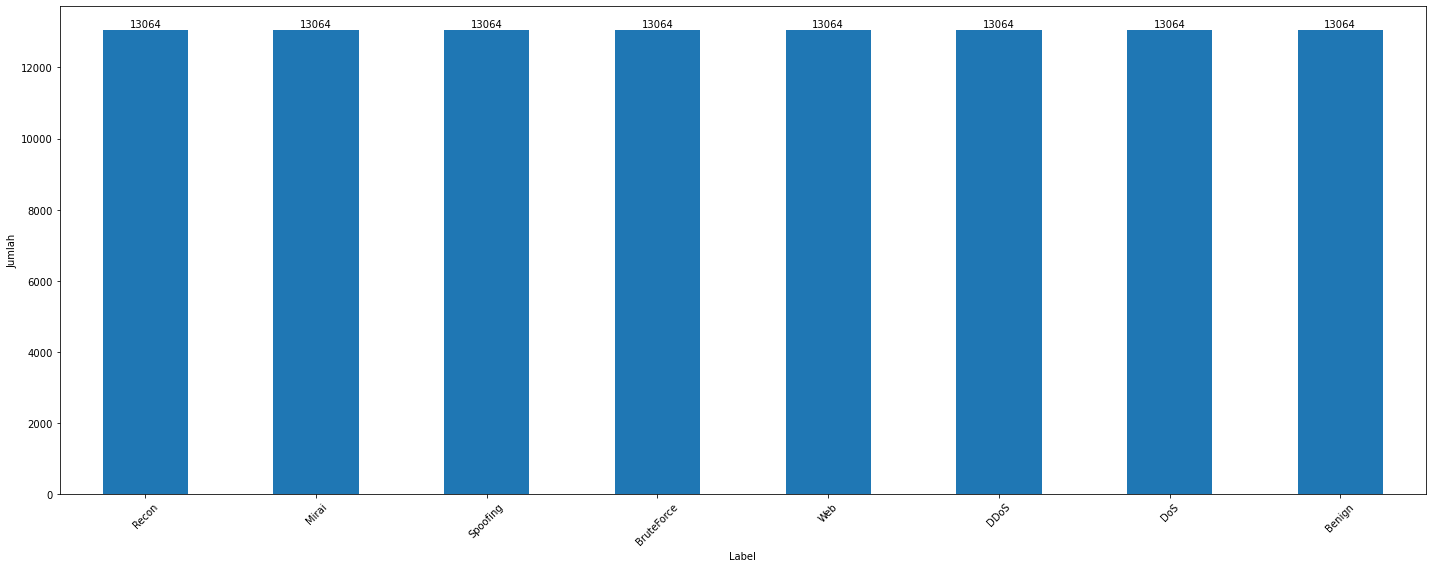

In [3]:
# Menghitung jumlah masing-masing label
label_counts = combined_df['label'].value_counts()

# Mengurutkan label berdasarkan jumlahnya dari terbanyak ke terkecil
label_counts = label_counts.sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(20, 8))
label_counts.plot(kind='bar')

# Menambahkan label sumbu x (label) dan sumbu y (jumlah)
plt.xlabel('Label')
plt.ylabel('Jumlah')

# Menambahkan teks dengan jumlah masing-masing pada setiap bar
for i, v in enumerate(label_counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# Menampilkan grafik
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca jika terlalu banyak
plt.tight_layout()  # Untuk mengatur layout agar tidak tumpang tindih
plt.show()

### Klasifikasi Label Menjadi 8 Kelas

In [4]:
# Membuat peta pemetaan label ke dalam 8 kelas yang diinginkan
class_mapping = {
    'DDoS': ['DDoS', 'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood', 'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation', 'DDoS-UDP_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-ACK_Fragmentation', 'DDoS-SlowLoris'],
    'DoS': ['DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-UDP_Flood', 'DoS-HTTP_Flood'],
    'Mirai': ['Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood'],
    'Benign': ['BenignTraffic'],
    'Spoofing': ['DNS_Spoofing', 'MITM-ArpSpoofing'],
    'Recon': ['Recon-PortScan', 'Recon-PingSweep', 'Recon-OSScan', 'VulnerabilityScan', 'Recon-HostDiscovery'],
    'Web': ['SqlInjection', 'CommandInjection', 'Backdoor_Malware', 'Uploading_Attack', 'XSS', 'BrowserHijacking'],
    'BruteForce': ['DictionaryBruteForce']
}

# Mengganti label-label pada kolom 'label' dengan label kelas yang sesuai
combined_df['label'] = combined_df['label'].apply(lambda x: next((k for k, v in class_mapping.items() if x in v), x))

# Cek distribusi kelas setelah pengelompokkan
class_distribution_after_mapping = Counter(combined_df['label'])
print("Distribusi Kelas Setelah Pengelompokkan:", class_distribution_after_mapping)

Distribusi Kelas Setelah Pengelompokkan: Counter({'Benign': 13064, 'BruteForce': 13064, 'DDoS': 13064, 'DoS': 13064, 'Mirai': 13064, 'Recon': 13064, 'Spoofing': 13064, 'Web': 13064})


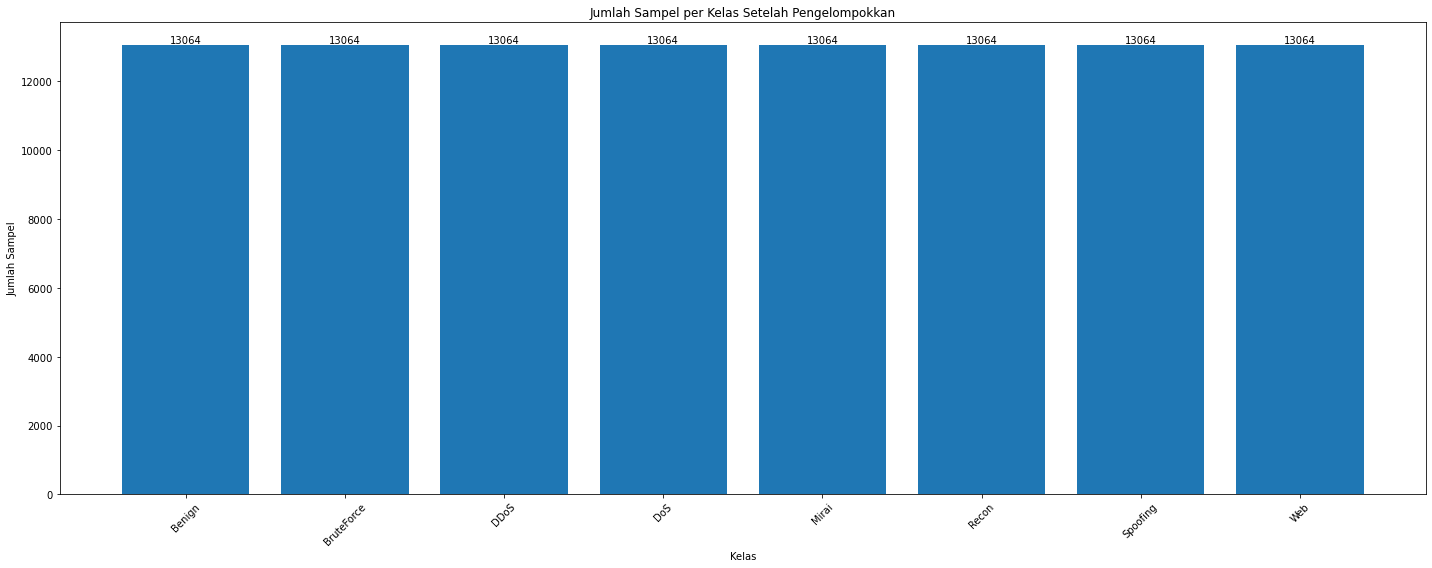

In [5]:
# Menghitung jumlah label per kelas
class_counts = dict(class_distribution_after_mapping)

# Membuat bar chart
plt.figure(figsize=(20, 8))
bars = plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Jumlah Sampel per Kelas Setelah Pengelompokkan')
plt.xticks(rotation=45)

# Menambahkan teks dengan jumlah masing-masing pada setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [6]:
combined_df['label']

0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
           ...  
104507       Web
104508       Web
104509       Web
104510       Web
104511       Web
Name: label, Length: 104512, dtype: object

## Data Pre-Processing

### Data Cleaning

#### Handling Missing Value

In [7]:
missing_values = combined_df.isnull().sum()
missing_values

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [8]:
# Hapus baris yang mengandung missing values
combined_df = combined_df.dropna()

#### Handling Duplicate Value

In [9]:
# Menghapus data duplikat
combined_df = combined_df.drop_duplicates()

### Handling Imbalance Class Dengan Undersampling

In [10]:
# Menghitung jumlah sampel di setiap kelas sebelum Random Undersampling
class_distribution_before = Counter(combined_df['label'])
print("Distribusi Kelas Sebelum Random Undersampling:", class_distribution_before)

# Memisahkan fitur dan target
X = combined_df.drop(columns=['label'])
y = combined_df['label']

# Menerapkan Random Undersampling pada seluruh data
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Menghitung jumlah sampel di setiap kelas setelah Random Undersampling
class_distribution_after = Counter(y_resampled)
print("Distribusi Kelas Setelah Random Undersampling:", class_distribution_after)

Distribusi Kelas Sebelum Random Undersampling: Counter({'Benign': 13064, 'BruteForce': 13064, 'DDoS': 13064, 'DoS': 13064, 'Mirai': 13064, 'Recon': 13064, 'Spoofing': 13064, 'Web': 13064})
Distribusi Kelas Setelah Random Undersampling: Counter({'Benign': 13064, 'BruteForce': 13064, 'DDoS': 13064, 'DoS': 13064, 'Mirai': 13064, 'Recon': 13064, 'Spoofing': 13064, 'Web': 13064})


In [11]:
X_resampled

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,27.669304,689.9,12.6,90.3,39.116188,39.116188,0.0,0.0,0.0,0.0,...,69.211108,22.304869,84.7,1.665239e+08,13.5,11.773372,31.603995,5.764931e+02,1.0,244.6
1,91.378398,57996.0,14.8,61.2,5.994365,5.994365,0.0,0.0,0.0,0.0,...,478.092217,660.857369,65.8,1.665225e+08,13.5,30.877932,936.184289,4.395679e+05,1.0,244.6
2,0.465044,1550299.8,6.0,87.6,3642.141552,3642.141552,0.0,0.0,0.0,0.0,...,461.568571,460.086813,641.2,6.241798e-05,5.5,28.662564,650.661011,3.029826e+05,0.7,38.5
3,86.902002,1250155.9,11.5,130.6,21.738589,21.738589,0.0,0.0,0.0,0.0,...,309.561548,443.997983,267.3,2.646551e-02,5.5,24.326006,627.907969,2.655302e+05,0.9,38.5
4,200.524157,6725.9,7.0,69.5,14.490983,14.490983,0.0,0.0,0.0,0.0,...,85.260835,30.200387,89.3,1.665164e+08,13.5,13.060905,42.844485,9.666386e+02,1.0,244.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59821,253.505288,18713.2,6.5,128.3,0.829886,0.829886,0.0,0.0,0.0,0.0,...,116.933095,76.415097,114.6,1.841600e-02,5.5,15.146764,108.067266,7.343507e+03,0.9,38.5
56714,0.125199,5134.0,8.2,126.6,147.532878,147.532878,0.0,0.0,0.0,0.0,...,147.258770,81.167892,295.0,3.377986e-03,5.5,16.973862,114.788734,2.272707e+04,0.9,38.5
58859,74.521378,177308.8,7.1,62.6,85.809469,85.809469,0.0,0.0,0.0,0.0,...,399.487110,452.880527,179.2,1.668458e+08,13.5,28.296740,641.123945,2.065224e+05,1.0,244.6
100197,203.753195,14663.6,13.7,93.4,64541.743220,64541.743220,0.0,0.0,0.0,0.0,...,164.268578,124.964346,139.1,1.676387e+08,13.5,18.136489,177.019400,1.571952e+04,1.0,244.6


In [12]:
# Lakukan reset indeks
X_resampled_reset = X_resampled.reset_index(drop=True)

# Tampilkan DataFrame yang telah di-reset indeks
X_resampled_reset

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,27.669304,689.9,12.6,90.3,39.116188,39.116188,0.0,0.0,0.0,0.0,...,69.211108,22.304869,84.7,1.665239e+08,13.5,11.773372,31.603995,5.764931e+02,1.0,244.6
1,91.378398,57996.0,14.8,61.2,5.994365,5.994365,0.0,0.0,0.0,0.0,...,478.092217,660.857369,65.8,1.665225e+08,13.5,30.877932,936.184289,4.395679e+05,1.0,244.6
2,0.465044,1550299.8,6.0,87.6,3642.141552,3642.141552,0.0,0.0,0.0,0.0,...,461.568571,460.086813,641.2,6.241798e-05,5.5,28.662564,650.661011,3.029826e+05,0.7,38.5
3,86.902002,1250155.9,11.5,130.6,21.738589,21.738589,0.0,0.0,0.0,0.0,...,309.561548,443.997983,267.3,2.646551e-02,5.5,24.326006,627.907969,2.655302e+05,0.9,38.5
4,200.524157,6725.9,7.0,69.5,14.490983,14.490983,0.0,0.0,0.0,0.0,...,85.260835,30.200387,89.3,1.665164e+08,13.5,13.060905,42.844485,9.666386e+02,1.0,244.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104507,253.505288,18713.2,6.5,128.3,0.829886,0.829886,0.0,0.0,0.0,0.0,...,116.933095,76.415097,114.6,1.841600e-02,5.5,15.146764,108.067266,7.343507e+03,0.9,38.5
104508,0.125199,5134.0,8.2,126.6,147.532878,147.532878,0.0,0.0,0.0,0.0,...,147.258770,81.167892,295.0,3.377986e-03,5.5,16.973862,114.788734,2.272707e+04,0.9,38.5
104509,74.521378,177308.8,7.1,62.6,85.809469,85.809469,0.0,0.0,0.0,0.0,...,399.487110,452.880527,179.2,1.668458e+08,13.5,28.296740,641.123945,2.065224e+05,1.0,244.6
104510,203.753195,14663.6,13.7,93.4,64541.743220,64541.743220,0.0,0.0,0.0,0.0,...,164.268578,124.964346,139.1,1.676387e+08,13.5,18.136489,177.019400,1.571952e+04,1.0,244.6


In [13]:
y_resampled

0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
           ...  
59821        Web
56714        Web
58859        Web
100197       Web
102656       Web
Name: label, Length: 104512, dtype: object

In [14]:
# Lakukan reset indeks
y_resampled_reset = y_resampled.reset_index(drop=True)

# Tampilkan DataFrame yang telah di-reset indeks
y_resampled_reset

0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
           ...  
104507       Web
104508       Web
104509       Web
104510       Web
104511       Web
Name: label, Length: 104512, dtype: object

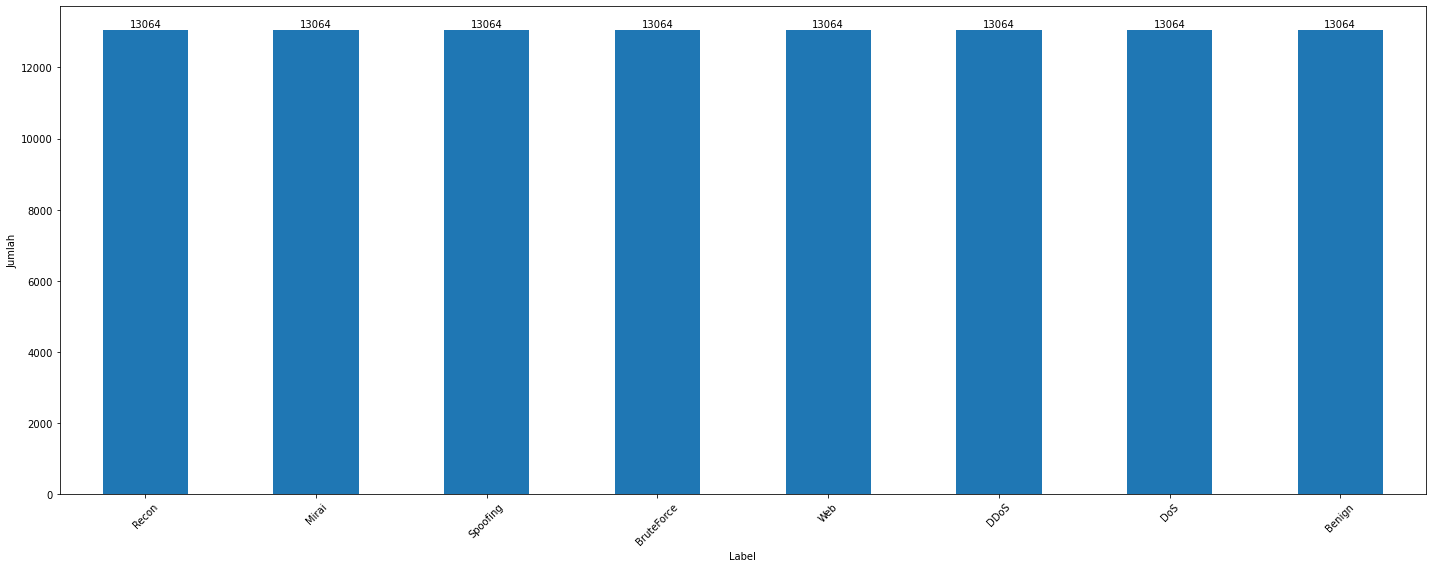

In [15]:
# Menghitung jumlah masing-masing label
label_counts = y_resampled.value_counts()

# Mengurutkan label berdasarkan jumlahnya dari terbanyak ke terkecil
label_counts = label_counts.sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(20, 8))
label_counts.plot(kind='bar')

# Menambahkan label sumbu x (label) dan sumbu y (jumlah)
plt.xlabel('Label')
plt.ylabel('Jumlah')

# Menambahkan teks dengan jumlah masing-masing pada setiap bar
for i, v in enumerate(label_counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# Menampilkan grafik
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca jika terlalu banyak
plt.tight_layout()  # Untuk mengatur layout agar tidak tumpang tindih
plt.show()

## Save Data to CSV

In [16]:
# Gabungkan X_resampled_reset dan y_resampled_reset menjadi satu DataFrame
combined_df = pd.concat([X_resampled_reset, y_resampled_reset], axis=1)

# Simpan DataFrame gabungan ke dalam file CSV
combined_df.to_csv('data_combined.csv', index=False)

print("Data berhasil disimpan ke 'data_combined.csv'")

Data berhasil disimpan ke 'data_combined.csv'
